# Introduction to `scikit-learn` with univariate linear regression

Adapted from: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from skrub import tabular_learner
from skrub.datasets import fetch_employee_salaries

sns.set()

Beware:
```python
import sklearn; sklearn.show_versions()
```
but:
```bash
!pip install scikit-learn
!pip show scikit-learn
```

Beware of how you do the imports: it changes how you should call the class:
```python
from sklearn import linear_model.LinearRegression
model = linear_model.LinearRegression()
```
or
```python
from sklearn.linear_model import LinearRegression
model = LinearRegression()
```

## Loading the data

In [2]:
# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
X = X[:, np.newaxis, 2]

Our task is a linear regression problem (predicting univariate $y$ from univariate $x$):

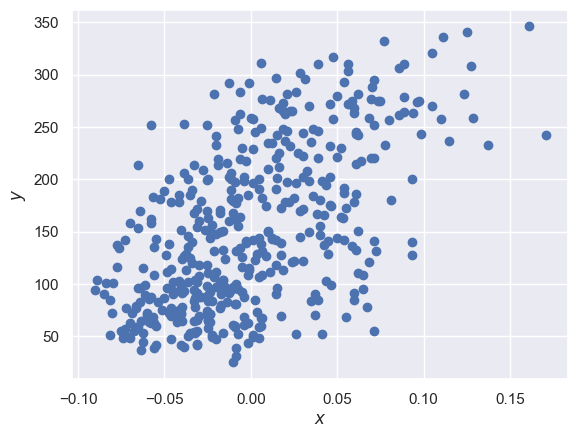

In [3]:
plt.scatter(X, y)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

## Splitting the data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

We have randomly selected 80% of our samples as "train" and 20% of our data as "test":

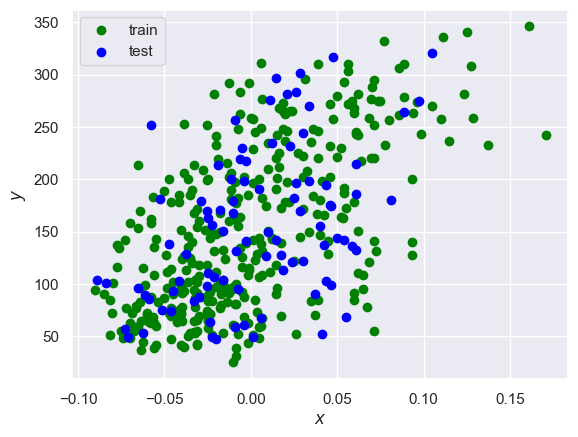

In [5]:
plt.scatter(X_train, y_train, color="green", label="train")
plt.scatter(X_test, y_test, color="blue", label="test")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

By default, shuffling is activated in `train_test_split`.

## Modelling: univariate linear regression

In [6]:
#help(LinearRegression)  # it is a class: it has attributes and methods

Create linear regression object:

In [7]:
model = LinearRegression()

The coefficients of the model (here there is only one coefficient) are not defined before fitting:

In [8]:
model.coef_  

AttributeError: 'LinearRegression' object has no attribute 'coef_'

Train the model using the training set (samples in green in the above plot):

In [9]:
model.fit(X_train, y_train)

LinearRegression()

After fitting, the coefficients are defined:

In [10]:
model.coef_

array([981.65543614])

More generally, `_` at the end of an attribute (e.g. `coef_`) of an estimator in scikit-learn indicates that this attribute exists only after fitting the estimator!

Make predictions using the testing set (samples in red: only x-axis because we have `X_test` but not `y_test`):

In [11]:
y_pred = model.predict(X_test)

Root mean squared error (where `y_test` represents the ground truths):

In [12]:
root_mean_squared_error(y_test, y_pred)

np.float64(64.42577271038341)

This is an *error* of the model on the test set: the higher the error, the worse the model.

Coefficient of determination:

In [13]:
r2_score(y_test, y_pred)

0.19057346847560142

This is a *score* of the model: its lies between $0$ and $1$; the higher the score, the better the model. Note that, here, our score is quite bad.

You can also use the `score` method:

In [14]:
model.score(X_test, y_test)

0.19057346847560142

Note that:
```python
model.score(X_test, y_test)
```
amounts to:
```python
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)
```
Note that the users should be aware of the default score used for each scikit-learn estimator they use!

We can also compute the score on the train set:

In [15]:
model.score(X_train, y_train)

0.3756308132776308

## Plotting the predictions and the linear regression model

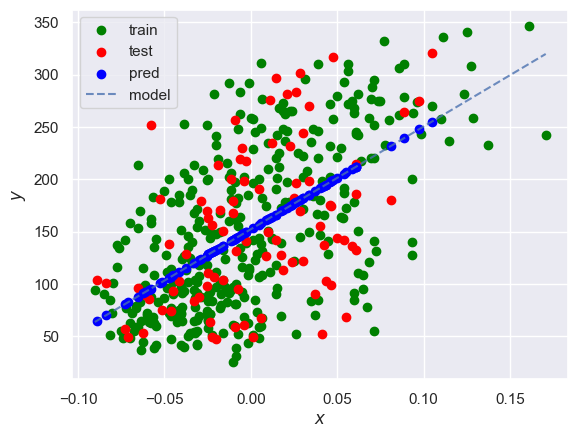

In [16]:
# Plot the training set, the testing set, and well as the predictions of the testing set
plt.scatter(X_train, y_train, color="green", label="train")
plt.scatter(X_test, y_test, color="red", label="test")
plt.scatter(X_test, y_pred, color="blue", label="pred")

# Model: y = ax + b where a and b are the parameters of our univariate linear regression
a = model.coef_
b = model.intercept_
X = np.linspace(start=X.min(), stop=X.max(), num=2) # 2 samples are sufficient to draw a line
Y = a * X + b
plt.plot(X, Y, "--", label="model", alpha=0.8)

plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.show()

- We observe that the predictions from scikit-learn's linear regression object do $y = ax+b$ where parameters $a$ and $b$ are learned on the training set during `model.fit(X_train, y_train)`. All the predictions fall on that straight dashed line.
- By comparing the points in red (ground truths) with the points in blue (predictions), we get an idea of the prediction error of our linear regression model.

# `skrub`'s `tabular_learner` which gives a strong baseline

In [17]:
dataset = fetch_employee_salaries()
df = dataset.X
y = dataset.y

In [18]:
df.head()

,gender,department,department_name,division,assignment_category,employee_position_title,date_first_hired,year_first_hired
0,F,POL,Department of Police,MSB Information Mgmt and Tech Division Records...,Fulltime-Regular,Office Services Coordinator,09/22/1986,1986
1,M,POL,Department of Police,ISB Major Crimes Division Fugitive Section,Fulltime-Regular,Master Police Officer,09/12/1988,1988
2,F,HHS,Department of Health and Human Services,Adult Protective and Case Management Services,Fulltime-Regular,Social Worker IV,11/19/1989,1989
3,M,COR,Correction and Rehabilitation,PRRS Facility and Security,Fulltime-Regular,Resident Supervisor II,05/05/2014,2014
4,M,HCA,Department of Housing and Community Affairs,Affordable Housing Programs,Fulltime-Regular,Planning Specialist III,03/05/2007,2007


In [19]:
model = tabular_learner("regressor")
model.fit(df, y);

In [20]:
model.predict(df)

array([ 68031.75381625,  97270.30129716, 106600.97927238, ...,
       113703.5597642 , 144312.84598625,  74732.80430816])

In [21]:
model.score(df, y)

0.9626433621243308

`tabular_learner` is a big scikit-learn pipeline that does a lot of things for you:

In [22]:
model

Pipeline(steps=[('tablevectorizer',
                 TableVectorizer(high_cardinality=MinHashEncoder(),
                                 low_cardinality=ToCategorical())),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features='from_dtype'))])